In [121]:
from csas_csv_parser import *
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sbn

parse csv

In [122]:
csv_file_path = 'ui_logs_2023-03-20 16_29_49.774183.csv'

events = filter_events_by_time(
    events=parse_all_events_from_csv(csv_file_path),
    date_from=date(2023, 3, 6)
)


Event distribution

Text(4.5, 550, 'likes/dislikes=0.31')

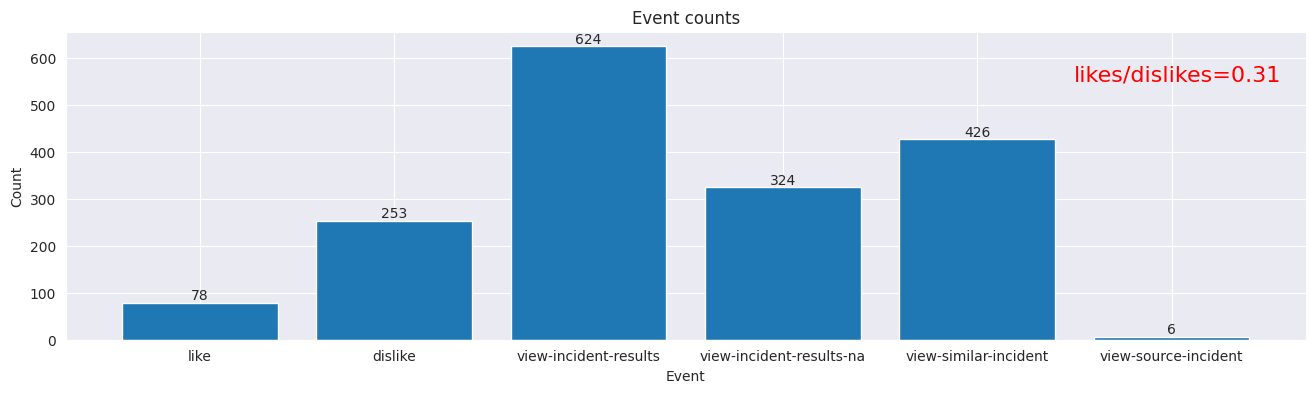

In [137]:
event_counts: dict[EventType, int] = get_event_type_counts(events)

f, ax = plt.subplots(figsize=(16, 4))
plt.bar(
    x=range(len(event_counts)),
    height=event_counts.values(),
    tick_label=[event_type.value for event_type in event_counts.keys()]
)
plt.title('Event counts')
plt.xlabel('Event')
plt.ylabel('Count')
# add the count above each bar
for i, count in enumerate(event_counts.values()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

ax.text(4.5, 550, f"likes/dislikes={float(event_counts[EventType.LIKE] / event_counts[EventType.DISLIKE]):.2f}",
        color='red', size=16)

Counts by dislikes

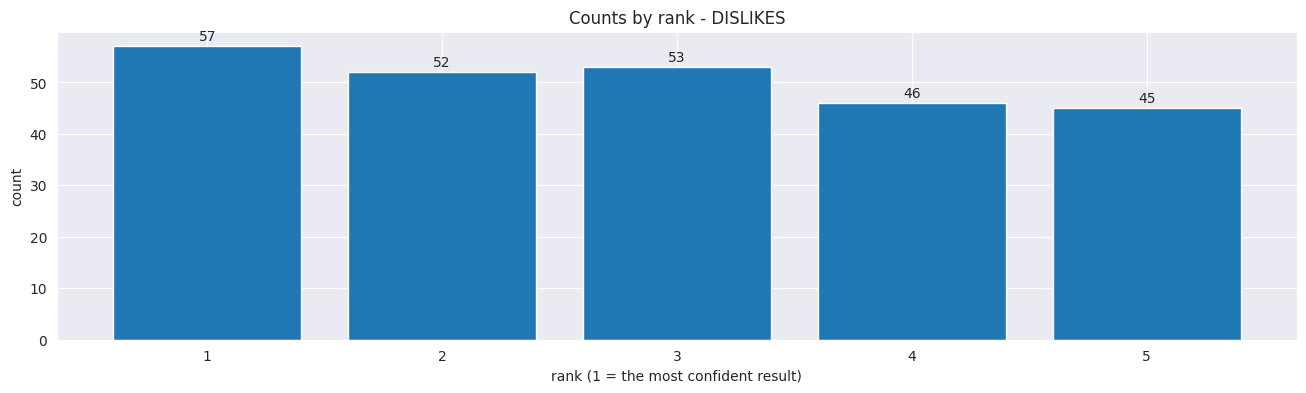

In [124]:
dislike_events: list[Event] = [event for event in events if event.event_type == EventType.DISLIKE]

rank_count_dislikes: dict[int, int] = {i: 0 for i in range(5)}
dislike_event: Event
for dislike_event in dislike_events:
    rank_count_dislikes[dislike_event.rank] += 1

f, ax = plt.subplots(figsize=(16, 4))
plt.bar(
    x=range(len(rank_count_dislikes)),
    height=rank_count_dislikes.values(),
    tick_label=list(range(1, 6))
)
plt.title('Counts by rank - DISLIKES')
plt.xlabel('rank (1 = the most confident result)')
plt.ylabel('count')
# add the count above each bar
for i, count in enumerate(rank_count_dislikes.values()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

Counts by likes

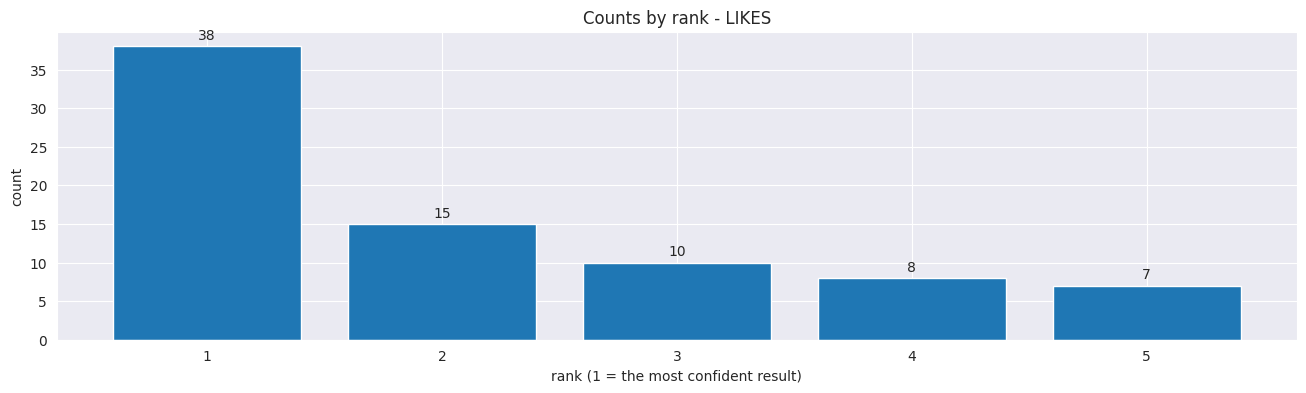

In [125]:
like_events: list[Event] = [event for event in events if event.event_type == EventType.LIKE]

rank_count_likes: dict[int, int] = {i: 0 for i in range(5)}
like_event: Event
for like_event in like_events:
    rank_count_likes[like_event.rank] += 1

f, ax = plt.subplots(figsize=(16, 4))
plt.bar(
    range(len(rank_count_likes)),
    rank_count_likes.values(),
    tick_label=list(range(1, 6))
)
plt.title('Counts by rank - LIKES')
plt.xlabel('rank (1 = the most confident result)')
plt.ylabel('count')
# add the count above each bar
for i, count in enumerate(rank_count_likes.values()):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

### User uniqueness statistics

In [126]:
df: pd.DataFrame = pd.DataFrame.from_records([event.to_dict() for event in events])

unique_users: pd.Series = df['client_id'].unique()

print(f"unique users {unique_users.size} from total of {len(events)} events")
print(f"uniqueness: {float(unique_users.size / len(events)) * 100:.2f}% ")

unique users 314 from total of 1711 events
uniqueness: 18.35% 


In [127]:
df_likes = pd.DataFrame.from_records([event.to_dict() for event in events
                                      if event.event_type == EventType.LIKE])

unique_likers = df_likes['client_id'].unique()

print(f"unique users {unique_likers.size} liked from total of {len(like_events)} like events")
print(f"like uniqueness: {float(unique_likers.size / df_likes.shape[0]) * 100:.2f}%")

unique users 37 liked from total of 78 like events
like uniqueness: 47.44%


In [128]:
df_dislikes: pd.DataFrame = pd.DataFrame.from_records([event.to_dict() for event in dislike_events
                                                       if event.event_type == EventType.DISLIKE])

unique_dislikers = df_dislikes['client_id'].unique()

print(f"unique users {unique_dislikers.size} disliked from total of {df_dislikes.shape[0]} dislike events")
print(f"dislike uniqueness: {float(unique_dislikers.size / df_dislikes.shape[0]) * 100:.2f}%")

unique users 62 disliked from total of 253 dislike events
dislike uniqueness: 24.51%


In [138]:
unique_dislikers_with_counts: pd.Series = df_dislikes['client_id'].value_counts()
OUTLIER_THRESHOLD: float = 0.05
k = int(unique_dislikers_with_counts.size * OUTLIER_THRESHOLD)
unique_dislikers_with_counts = unique_dislikers_with_counts[k:-k]

print(
    f"unique users {unique_dislikers_with_counts.size} disliked from total of {df_dislikes.shape[0] - 2 * k} dislike events, best {k} and worst {k} outliers removed ")
print(f"dislike uniqueness: {float(unique_dislikers_with_counts.size / df_dislikes.shape[0]) * 100:.2f}%")

unique users 56 disliked from total of 247 dislike events, best 3 and worst 3 outliers removed 
dislike uniqueness: 22.13%


Dislikes by unique client ids

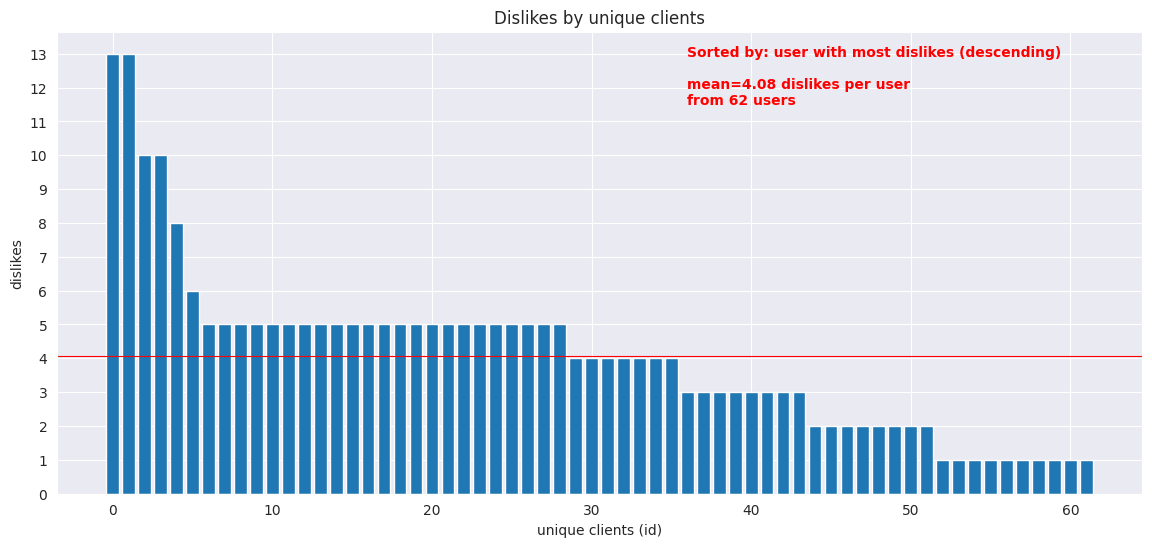

In [139]:
unique_dislikers_with_counts: pd.Series = df_dislikes['client_id'].value_counts()

f, ax = plt.subplots(figsize=(14, 6))
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.yticks(range(0, 15))
plt.title("Dislikes by unique clients")
plt.xlabel("unique clients (id)")
plt.ylabel('dislikes')
plt.bar(
    range(unique_dislikers_with_counts.size),
    unique_dislikers_with_counts
)
plt.text(36, 11.5,
         f"Sorted by: user with most dislikes (descending) \n\n"
         f"mean={unique_dislikers_with_counts.mean():.2f} dislikes per user\n"
         f"from {unique_dislikers_with_counts.size} users",
         color='red', weight='bold')
plt.axhline(unique_dislikers_with_counts.mean(), linewidth=.8, color='r')

Dislikes by unique client ids,  removing top k outliers

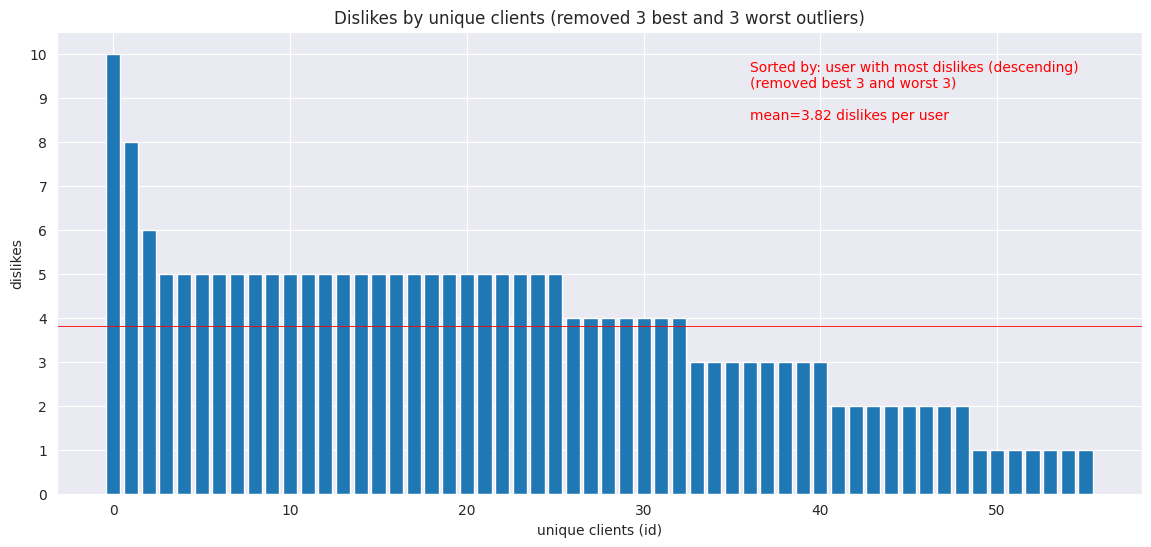

In [150]:
unique_dislikers_with_counts: pd.Series = df_dislikes['client_id'].value_counts()
OUTLIER_THRESHOLD: float = 0.05
k = int(unique_dislikers_with_counts.size * OUTLIER_THRESHOLD)
unique_dislikers_with_counts = unique_dislikers_with_counts[k:-k]

f, ax = plt.subplots(figsize=(14, 6))
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.yticks(range(0, 15))
plt.title(f"Dislikes by unique clients (removed {k} best and {k} worst outliers)")
plt.xlabel("unique clients (id)")
plt.ylabel('dislikes')
plt.bar(range(unique_dislikers_with_counts.size), unique_dislikers_with_counts)
plt.text(36, 8.5,
         f"Sorted by: user with most dislikes (descending) \n"
         f"(removed best {k} and worst {k})\n\n"
         f"mean={unique_dislikers_with_counts.mean():.2f} dislikes per user",
         color='red', )
plt.axhline(unique_dislikers_with_counts.mean(), linewidth=.6, color='r')

Likes by unique client ids

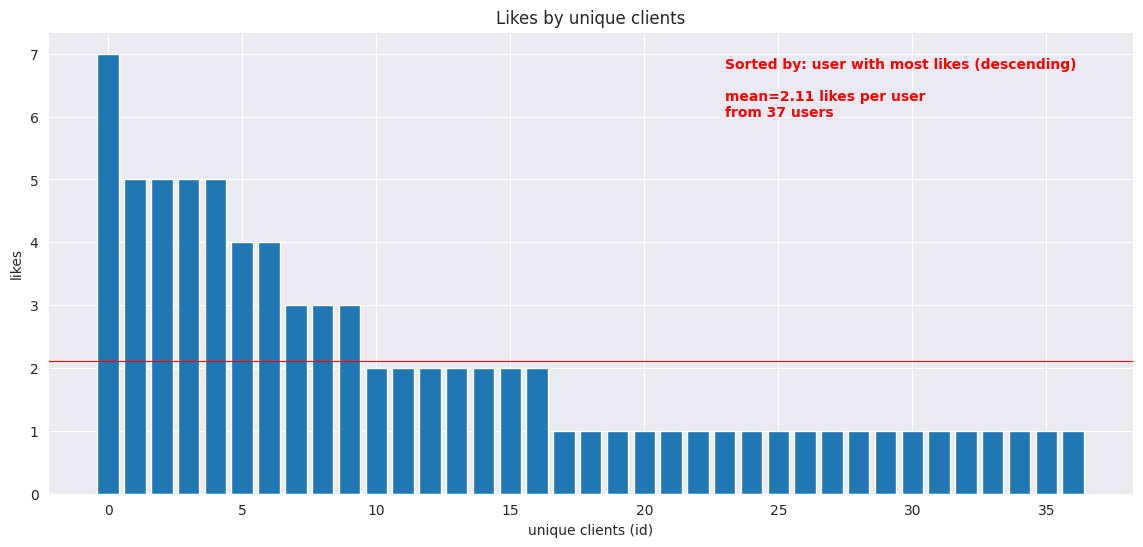

In [151]:
df_likes = pd.DataFrame.from_records([event.to_dict() for event in events
                                      if event.event_type == EventType.LIKE])

unique_likers_with_counts: pd.Series = df_likes['client_id'].value_counts()

f, ax = plt.subplots(figsize=(14, 6))
#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.yticks(range(0, 10))
plt.bar(
    range(unique_likers_with_counts.size),
    unique_likers_with_counts
)
plt.title("Likes by unique clients")
plt.xlabel("unique clients (id)")
plt.ylabel('likes')

plt.text(23, 6,
         f"Sorted by: user with most likes (descending) \n\n"
         f"mean={unique_likers_with_counts.mean():.2f} likes per user\n"
         f"from {unique_likers_with_counts.size} users",
         color='red', weight='bold')
plt.axhline(float(unique_likers_with_counts.mean()), linewidth=.8, color='r')


dislike

In [133]:
df_sentiment = pd.DataFrame.from_records([event.to_dict() for event in events
                                          if
                                          event.event_type == EventType.LIKE or event.event_type == EventType.DISLIKE])

All distinct queries that got dislike.

INC50162183    10
INC50209928     9
INC50500604     8
INC49482556     5
INC50258672     5
               ..
INC50161328     1
INC50065387     1
INC50113225     1
INC50065255     1
INC50644611     1
Name: source_ticket_id, Length: 69, dtype: int64


Text(0, 0.5, 'number of dislikes)')

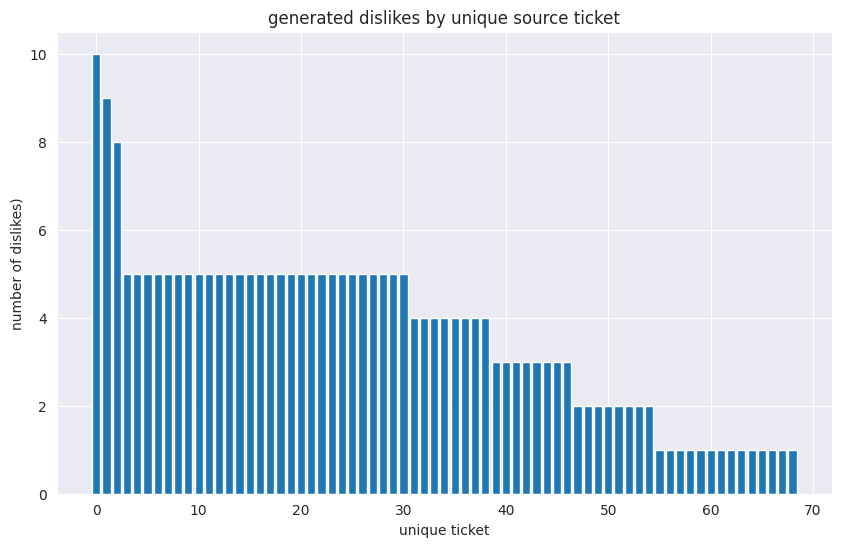

In [134]:
print(df_dislikes.source_ticket_id.value_counts())
f, ax = plt.subplots(figsize=(10, 6))
plt.bar(
    range(df_dislikes.source_ticket_id.value_counts().size),
    df_dislikes.source_ticket_id.value_counts()
)
plt.title('generated dislikes by unique source ticket')
plt.xlabel('unique ticket')
plt.ylabel('number of dislikes)')

Unique users for incident 'INC44915742

In [135]:
pprint(
    set(
        [event.client_id for event in events
         if event.event_type == EventType.DISLIKE and event.source_ticket_id == 'INC50162183']  # INC44915742
    )
)

{UUID('3e58bdf5-096b-4121-8264-90d92db568bd'),
 UUID('92479164-bad2-401b-bc50-179f33732aa3')}


<BarContainer object of 2 artists>

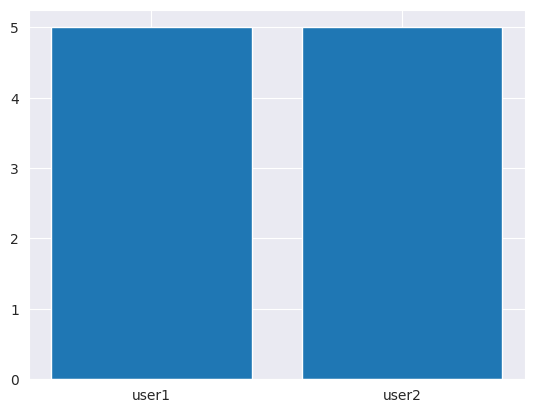

In [147]:
df_INC50162183: pd.DataFrame = pd.DataFrame.from_records(
    [event.to_dict() for event in events
     if event.event_type == EventType.DISLIKE and event.source_ticket_id == 'INC50162183']
)
unique_users: pd.Series = df_INC50162183['client_id'].value_counts()

plt.bar(range(unique_users.size), unique_users, tick_label=['user' + str(i) for i in range(1, unique_users.size + 1)])

plot likes that changed to dislike


plot dislikes that changed to likes